<a href="https://colab.research.google.com/github/PeggyK1/DS-Unit-1-Sprint-2-Statistics/blob/master/Peggy_Krom_LS_DS17_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import numpy as np
import pandas as pd
from scipy import stats

In [93]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv

--2020-06-10 23:54:54--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv.1’

bootcampers.csv.1   100%[===================>]   2.38M  --.-KB/s    in 0.1s    

2020-06-10 23:54:54 (22.8 MB/s) - ‘bootcampers.csv.1’ saved [2499384/2499384]



In [94]:
df = pd.read_csv('bootcampers.csv')
print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)

sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [96]:
sample1['ConvertedSalary'].mean()

55752.2

In [97]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would be more likely to trust Sample 2 because a greater sample size is going to more accurately represent the population.

I don't think a non-technical audience would be able to determine which one was more accurate. It kind of depends on how you would word it. If you said sample 1 and sample 2 then there's no way. If you said 20 out of 2760 vs 200 out of 2760, a portion of the audience could use critical thinking to say that the 200 sample would be more accurate. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

No the sample mean is just the average. It is incorporated into the equation of calculating the standard error, but standing alone it doesn't tell me much about it.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



1. Including the sample size compared to the population size
2. Graphically representing it so they can visualize it
3. Using Layman's Terms or plain English
4. Reporting confidence level and margin of error so they know how off your data could be comparitively

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
from scipy import stats

In [0]:
def confidence_interval(data, confidence=.95):
  sample = np.array(data)
  x_bar = sample.mean()
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  std_err = s / np.sqrt(n)
  moe = std_err * t
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

In [100]:
CI1 = confidence_interval(sample1['ConvertedSalary'])
CI1

(35805.10309625536, 55752.2, 75699.29690374463)

In [101]:
CI2 = confidence_interval(sample2['ConvertedSalary'])
CI2

(60593.058804479086, 68551.255, 76509.45119552092)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [15]:
print("Bootcamper's Converted Salary 20 Sample Estimate")
print('Mean:', CI1[1])
print('Margin of Error:', CI1[2]-CI1[1])

Bootcampers Converted Salary 20 Sample Estimate
Mean: 55752.2
Margin of Error: 19947.096903744634


In [16]:
print("Bootcamper's Converted Salary 200 Sample Estimate")
print('Mean:', CI2[1])
print('Margin of Error:', CI2[2]-CI2[1])

Bootcamper's Converted Salary 200 Sample Estimate
Mean: 68551.255
Margin of Error: 7958.196195520912


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

In [0]:
import matplotlib.pyplot as plt

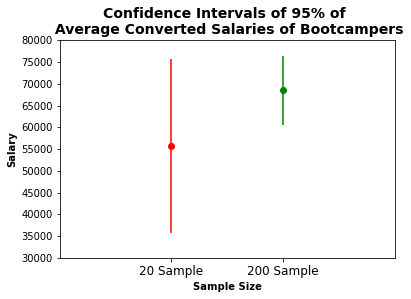

In [39]:
plt.errorbar(x=0, y=CI1[1], yerr=CI1[2]-CI1[1], fmt='o', color='red')
plt.errorbar(x=1, y=CI2[1], yerr=CI2[2]-CI2[1], fmt='o', color='green')
plt.title('Confidence Intervals of 95% of \n Average Converted Salaries of Bootcampers', fontsize='14', fontweight='bold')
plt.xticks(ticks=[0,1], labels=['20 Sample', '200 Sample'], fontsize='12')
plt.xlim(-1, 2)
plt.ylabel('Salary', fontweight='bold')
plt.xlabel('Sample Size', fontweight='bold')
plt.yticks(ticks=range(30000, 85000, 5000))
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

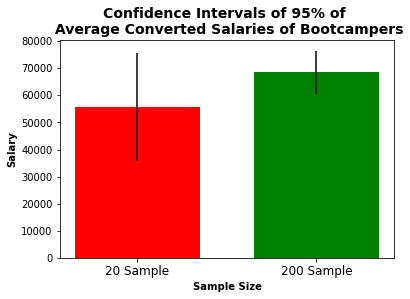

In [48]:
plt.bar(x=0, height=CI1[1], width=.7, yerr=(CI1[2]-CI1[1]), color='red')
plt.bar(x=1, height=CI2[1], width=.7, yerr=(CI2[2]-CI2[1]), color='green')
plt.title('Confidence Intervals of 95% of \n Average Converted Salaries of Bootcampers', fontsize='14', fontweight='bold')
plt.xticks(ticks=[0,1], labels=['20 Sample', '200 Sample'], fontsize='12')
plt.ylabel('Salary', fontweight='bold')
plt.xlabel('Sample Size', fontweight='bold')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [50]:
ciD = confidence_interval(df['ConvertedSalary'])
ciD

(71299.82986224785, 73453.40420137631, 75606.97854050477)

In [51]:
print("Bootcamper's Converted Salary")
print('Mean:', ciD[1])
print('Margin of Error:', ciD[2]-ciD[1])

Bootcamper's Converted Salary
Mean: 73453.40420137631
Margin of Error: 2153.574339128463


In [53]:
#20 Sample Comparison
print('Mean Difference:', CI1[1]-ciD[1])
print('MOE Difference:', (CI1[2]-CI1[1])-(ciD[2]-ciD[1]))

Mean Difference: -17701.204201376313
MOE Difference: 17793.52256461617


In [54]:
#200 Sample Comparison
print('Mean Difference:', CI2[1]-ciD[1])
print('MOE Difference:', (CI2[2]-CI2[1])-(ciD[2]-ciD[1]))

Mean Difference: -4902.149201376305
MOE Difference: 5804.6218563924485


In [56]:
print('20 Sample', stats.sem(sample1['ConvertedSalary']))
print('200 Sample', stats.sem(sample2['ConvertedSalary']))
print('Whole Data', stats.sem(df['ConvertedSalary']))

20 Sample 9530.275995506441
200 Sample 4035.6853799484325
Whole Data 1098.300754066944


The larger the sample, the more precise.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

**Accuracy:** how close a measurement is to a known value

**Precision:** how repeatable or reproducable measurements are

While both accuracy and precision reflect how close a measurement is to an actual value, Measurements can be precise without being accurate where they are not close to the targeted value but all measurements are the same or similar or they can be accurate without being precise where they are close to the targeted value but the measurements are different each time.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

Confidence interval means that the percentage of true population means from the  confidence interval calculations will match whatever the confidence level is. So if the confidence level is 95%, the calculations will match the true population means 95% of the time.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

### Stretch Goal #1

In [0]:
# Stretch Goal #1

In [57]:
confidence_interval(sample2['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

In [61]:
#inside confidence interval
stats.ttest_1samp(sample2['ConvertedSalary'], 76509.451)

Ttest_1sampResult(statistic=-1.971956495801386, pvalue=0.05000000557483437)

**P-Value**=0.05

In [62]:
#outside confidence interval
stats.ttest_1samp(sample2['ConvertedSalary'], 60593)

Ttest_1sampResult(statistic=1.9719711153751274, pvalue=0.049998323429747964)

**P-Value**=0.049

Whether you are outside or inside the CI boundaries, you are going to get the same p-value that a 1 sample ttest would give you 

### Stretch Goal #2

In [102]:
#Importing Congressional Voting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-10 23:56:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-06-10 23:56:23 (610 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [103]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
congress = pd.read_csv('house-votes-84.data', names=column_headers)
print(congress.shape)
congress.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [104]:
congress = congress.replace({'y':1, 'n':0, '?':np.NaN})
congress.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [105]:
rep = congress[congress['party'] == 'republican']
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [106]:
HI = confidence_interval(rep['handicapped-infants'].dropna())
HI

(0.12765166444807918, 0.18787878787878787, 0.24810591130949655)

In [107]:
WP = confidence_interval(rep['water-project'].dropna())
WP

(0.42526571045979167, 0.5067567567567568, 0.5882478030537219)

In [108]:
B = confidence_interval(rep['budget'].dropna())
B

(0.08143520131697565, 0.13414634146341464, 0.18685748160985363)

In [109]:
PF = confidence_interval(rep['physician-fee-freeze'].dropna())
PF

(0.9710067448304756, 0.9878787878787879, 1.0047508309271003)

In [110]:
ES = confidence_interval(rep['el-salvador-aid'].dropna())
ES

(0.9183979451371699, 0.9515151515151515, 0.9846323578931332)

In [111]:
RG = confidence_interval(rep['religious-groups'].dropna())
RG

(0.850987486003394, 0.8975903614457831, 0.9441932368881721)

In [112]:
AS = confidence_interval(rep['anti-satellite-ban'].dropna())
AS

(0.17420089269707362, 0.24074074074074073, 0.30728058878440784)

In [113]:
AC = confidence_interval(rep['aid-to-contras'].dropna())
AC

(0.09595477158126557, 0.15286624203821655, 0.20977771249516752)

In [114]:
M = confidence_interval(rep['mx-missile'].dropna())
M

(0.06593485907282265, 0.11515151515151516, 0.16436817123020767)

In [115]:
I = confidence_interval(rep['immigration'].dropna())
I

(0.4809959592103161, 0.5575757575757576, 0.6341555559411991)

In [116]:
SF= confidence_interval(rep['synfuels'].dropna())
SF 

(0.0788755652396695, 0.1320754716981132, 0.18527537815655692)

In [117]:
E = confidence_interval(rep['education'].dropna())
E

(0.8176017935029393, 0.8709677419354839, 0.9243336903680285)

In [119]:
RTS = confidence_interval(rep['right-to-sue'].dropna())
RTS

(0.8061858971620528, 0.8607594936708861, 0.9153330901797194)

In [120]:
C = confidence_interval(rep['crime'].dropna())
C

(0.960253517544598, 0.9813664596273292, 1.0024794017100602)

In [121]:
DF = confidence_interval(rep['duty-free'].dropna())
DF

(0.044394355010013827, 0.08974358974358974, 0.13509282447716567)

In [122]:
SA = confidence_interval(rep['south-africa'].dropna())
SA

(0.5796460416043707, 0.6575342465753424, 0.7354224515463141)

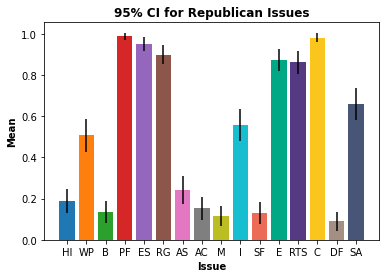

In [131]:
#Congress CI Graph
plt.bar(x=0, height=HI[1], yerr=(HI[2]-HI[1]))
plt.bar(x=1, height=WP[1], yerr=(WP[2]-WP[1]))
plt.bar(x=2, height=B[1], yerr=(B[2]-B[1]))
plt.bar(x=3, height=PF[1], yerr=(PF[2]-PF[1]))
plt.bar(x=4, height=ES[1], yerr=(ES[2]-ES[1]))
plt.bar(x=5, height=RG[1], yerr=(RG[2]-RG[1]))
plt.bar(x=6, height=AS[1], yerr=(AS[2]-AS[1]))
plt.bar(x=7, height=AC[1], yerr=(AC[2]-AC[1]))
plt.bar(x=8, height=M[1], yerr=(M[2]-M[1]))
plt.bar(x=9, height=I[1], yerr=(I[2]-I[1]))
plt.bar(x=10, height=SF[1], yerr=(SF[2]-SF[1]), color='#EB6B56')
plt.bar(x=11, height=E[1], yerr=(E[2]-E[1]), color='#00A885')
plt.bar(x=12, height=RTS[1], yerr=(RTS[2]-RTS[1]), color='#553982')
plt.bar(x=13, height=C[1], yerr=(C[2]-C[1]), color='#FAC51C')
plt.bar(x=14, height=DF[1], yerr=(DF[2]-DF[1]), color='#A38F84')
plt.bar(x=15, height=SA[1], yerr=(SA[2]-SA[1]), color='#475577')

plt.title("95% CI for Republican Issues", fontsize='12', fontweight='bold')

plt.xticks(ticks=range(0,16,1), labels=['HI', 'WP', 'B', 'PF', 'ES', 'RG', 'AS', 'AC', 'M', 'I', 'SF', 'E', 'RTS', 'C', 'DF', 'SA'])
plt.xlabel('Issue', fontweight='bold')
plt.ylabel('Mean', fontweight='bold')

plt.show;

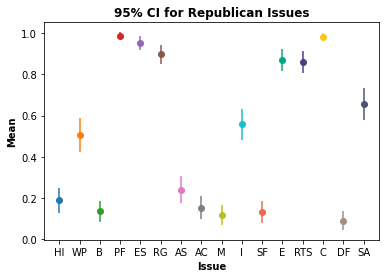

In [132]:
plt.errorbar(x=0, y=HI[1], yerr=(HI[2]-HI[1]), fmt='o')
plt.errorbar(x=1, y=WP[1], yerr=(WP[2]-WP[1]), fmt='o')
plt.errorbar(x=2, y=B[1], yerr=(B[2]-B[1]), fmt='o')
plt.errorbar(x=3, y=PF[1], yerr=(PF[2]-PF[1]), fmt='o')
plt.errorbar(x=4, y=ES[1], yerr=(ES[2]-ES[1]), fmt='o')
plt.errorbar(x=5, y=RG[1], yerr=(RG[2]-RG[1]), fmt='o')
plt.errorbar(x=6, y=AS[1], yerr=(AS[2]-AS[1]), fmt='o')
plt.errorbar(x=7, y=AC[1], yerr=(AC[2]-AC[1]), fmt='o')
plt.errorbar(x=8, y=M[1], yerr=(M[2]-M[1]), fmt='o')
plt.errorbar(x=9, y=I[1], yerr=(I[2]-I[1]), fmt='o')
plt.errorbar(x=10, y=SF[1], yerr=(SF[2]-SF[1]), fmt='o', color='#EB6B56')
plt.errorbar(x=11, y=E[1], yerr=(E[2]-E[1]), fmt='o', color='#00A885')
plt.errorbar(x=12, y=RTS[1], yerr=(RTS[2]-RTS[1]), fmt='o', color='#553982')
plt.errorbar(x=13, y=C[1], yerr=(C[2]-C[1]), fmt='o', color='#FAC51C')
plt.errorbar(x=14, y=DF[1], yerr=(DF[2]-DF[1]), fmt='o', color='#A38F84')
plt.errorbar(x=15, y=SA[1], yerr=(SA[2]-SA[1]), fmt='o', color='#475577')

plt.title("95% CI for Republican Issues", fontsize='12', fontweight='bold')

plt.xticks(ticks=range(0,16,1), labels=['HI', 'WP', 'B', 'PF', 'ES', 'RG', 'AS', 'AC', 'M', 'I', 'SF', 'E', 'RTS', 'C', 'DF', 'SA'])
plt.xlabel('Issue', fontweight='bold')
plt.ylabel('Mean', fontweight='bold')

plt.show;